# Payment Date Prediction


### Importing related Libraries 

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Silencing warnings (Stealth as a tiger 🐯)
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [3]:
df = pd.read_csv(r'./h2h_new_assignment_dataset.csv')

### Check the shape of the dataframe


In [4]:
df.shape

(50099, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
round((df.isnull().sum() / len(df)) * 100)

business_code               0.0
cust_number                 0.0
name_customer               0.0
clear_date                 20.0
buisness_year               0.0
doc_id                      0.0
posting_date                0.0
document_create_date        0.0
document_create_date.1      0.0
due_in_date                 0.0
invoice_currency            0.0
document type               0.0
posting_id                  0.0
area_business             100.0
total_open_amount           0.0
baseline_create_date        0.0
cust_payment_terms          0.0
invoice_id                  0.0
isOpen                      0.0
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
df[['invoice_id', 'doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
cr = df[['baseline_create_date', "document_create_date", 'document_create_date.1']].corr()
cr

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994105,0.999529
document_create_date,0.994105,1.000000,0.994572
document_create_date.1,0.999529,0.994572,1.000000


#### Please check, Column 'posting_id' is constant columns or not


In [12]:
df.columns[df.nunique() <= 1]

Index(['posting_id', 'area_business'], dtype='object')

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
df.isOpen.nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [14]:
df.drop(['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type',
         'document_create_date.1'], axis=1, inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50099 non-null  object 
 1   cust_number           50099 non-null  object 
 2   name_customer         50099 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50099 non-null  int64  
 5   doc_id                50099 non-null  int64  
 6   posting_date          50099 non-null  object 
 7   due_in_date           50099 non-null  int64  
 8   invoice_currency      50099 non-null  object 
 9   total_open_amount     50099 non-null  float64
 10  baseline_create_date  50099 non-null  int64  
 11  cust_payment_terms    50099 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.6+ MB


### Show all the Duplicate rows from the dataframe

In [16]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [17]:
df.duplicated().sum()

1162

### Drop all the Duplicate Rows

In [18]:
df = df.drop_duplicates(keep=False)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [19]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [20]:
df.shape

(47789, 12)

### Find out the total count of null values in each columns

In [21]:
df.isnull().count()

business_code           47789
cust_number             47789
name_customer           47789
clear_date              47789
buisness_year           47789
doc_id                  47789
posting_date            47789
due_in_date             47789
invoice_currency        47789
total_open_amount       47789
baseline_create_date    47789
cust_payment_terms      47789
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [22]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [23]:
print('Datatypes :')
print("clear_date : ", df['clear_date'].dtype)
print("posting_date : ", df['posting_date'].dtype)
print('due_in_date : ', df['due_in_date'].dtype)
print('baseline_create_date: ', df['baseline_create_date'].dtype)

Datatypes :
clear_date :  object
posting_date :  object
due_in_date :  int64
baseline_create_date:  int64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [24]:
def FormatDate(col):
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col], format='%Y%m%d')
    return df[col]

In [25]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = FormatDate('due_in_date')
df['baseline_create_date'] = FormatDate('baseline_create_date')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [26]:
df['clear_date'].dtype, df['posting_date'].dtype, df['due_in_date'].dtype, df['baseline_create_date'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [27]:
df['invoice_currency'].value_counts()

USD    43953
CAD     3836
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [28]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
50094    92832.27
50095    92832.27
50096    92832.27
50097    92832.27
50098    92832.27
Name: total_open_amount, Length: 47789, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [29]:
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD', df['total_open_amount'] * 0.7, df['total_open_amount'])

# df['converted_usd'] = df['total_open_amount']
# df.loc[df['invoice_currency'] == 'CAD','converted_usd'] = (df['total_open_amount'] * 0.7)

### Display the new "converted_usd" column values

In [30]:
df['converted_usd']

0        54273.280
1        79656.600
2         2253.860
3         2309.790
4        33133.290
           ...    
50094    64982.589
50095    64982.589
50096    64982.589
50097    64982.589
50098    64982.589
Name: converted_usd, Length: 47789, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [31]:
# df.groupby(['buisness_year'])['buisness_year'].count()
df['buisness_year'].value_counts()

2019    33242
2020    14547
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [32]:
df.drop(['invoice_currency', 'total_open_amount'], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [33]:
len(df)

47789

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [34]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9464
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [35]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

clear_date    9464
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [36]:
Nulldata = df[df['clear_date'].isnull()]
notNull = df[df['clear_date'].notnull()]
df = notNull

In [37]:
notNull

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


### Check the number of Rows and Columns for both the dataframes 

In [38]:
Nulldata.shape


(9464, 11)

In [39]:
notNull.shape

(38325, 11)

### Display the 5 records from maindata and nulldata dataframes

In [154]:
Nulldata.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2309.79,66,30,30,30,10,10,10,31,31,31,5,2684
7,200744019,2020,1930659387,11173.02,66,19,19,19,3,3,3,19,19,19,20,2773
10,200418007,2020,1930610806,3525.59,66,3,3,3,26,26,26,11,11,11,20,93
14,200739534,2020,1930788296,121105.65,66,15,15,15,30,30,30,15,15,15,20,2005
15,200353024,2020,1930817482,3726.06,66,23,23,23,26,26,26,16,16,16,35,714


In [41]:
notNull.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
df['Delay'] = df['clear_date'] - df['due_in_date']
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [43]:
avgdelay = df.groupby('name_customer')['Delay'].mean(numeric_only=False)
avgdelay

name_customer
11078 us               -69 days +00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                    16 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us              -83 days +00:00:00
Name: Delay, Length: 3856, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [44]:
df['avg_delay'] = df['name_customer'].map(avgdelay)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,2 days 21:47:04.615384615
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,25 days 00:00:00
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,29 days 19:12:00
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,4 days 09:56:54.022140221
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,48 days 06:51:25.714285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-10 days +01:15:47.368421053
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days,-2 days +16:11:02.469733657
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days,2 days 11:25:42.857142857
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,17 days 22:31:23.076923077


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [45]:
df['avg_delay'] = pd.to_timedelta(df['avg_delay']).dt.total_seconds()

### Display the maindata dataframe 

In [46]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,2.512246e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,2.160000e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,2.574720e+06
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,3.814140e+05
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,4.171886e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-8.594526e+05
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days,-1.145375e+05
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days,2.139429e+05
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.549883e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [47]:
df.drop(['Delay', 'clear_date'], axis=1, inplace=True)

In [48]:
df

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,2.512246e+05
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,2.160000e+06
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,2.574720e+06
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,3.814140e+05
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,4.171886e+06
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,-8.594526e+05
49996,U001,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-1.145375e+05
49997,U001,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,2.139429e+05
49998,U001,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,1.549883e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [49]:
X = df.drop(['avg_delay'], axis=1)
X.shape

(38325, 10)

In [50]:
y = df['avg_delay']
y.shape

(38325,)

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [51]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [52]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((22995, 10), (15330, 10), (22995,), (15330,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [54]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((7665, 10), (7665, 10), (7665,), (7665,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

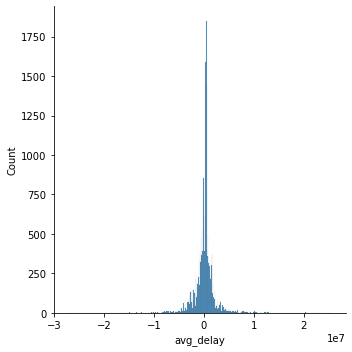

In [55]:
sns.displot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [56]:
x_train = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

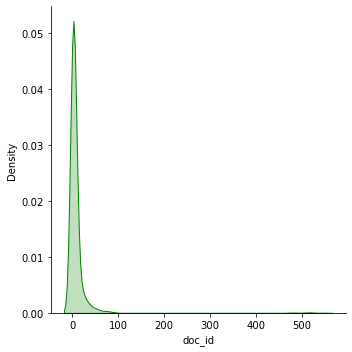

In [57]:
sns.displot(x_train['doc_id'], kind='kde', fill=True, color='g')

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

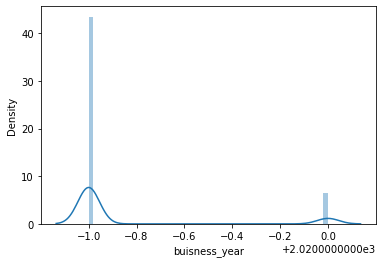

In [58]:
sns.distplot(X_train['buisness_year'])

<AxesSubplot:ylabel='Density'>

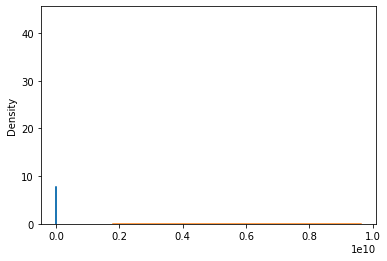

In [59]:
sns.distplot(x=X_train['buisness_year'])
sns.distplot(x=X_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [60]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
13551,U001,200769623,WAL-MAR trust,2019,1929258497,2019-04-05,2019-05-19,2019-05-04,NAH4,2372.77
36342,U001,200769623,WAL-MAR us,2019,1930280031,2019-12-15,2019-12-30,2019-12-15,NAH4,26130.40
28137,U001,200793088,DEMOU corporation,2020,1930428578,2020-01-24,2020-02-08,2020-01-24,NAA8,122538.65
6540,U001,200794332,COST foundation,2019,1929758798,2019-08-19,2019-09-03,2019-08-19,NAAX,14831.20
17570,U001,200769623,WAL-MAR corp,2020,1930386494,2020-11-01,2020-01-26,2020-01-11,NAH4,3309.31
...,...,...,...,...,...,...,...,...,...,...
30483,U001,200765011,MAINES us,2019,1930135658,2019-11-18,2019-12-03,2019-11-18,NAA8,5738.33
40691,U001,200759878,SA associates,2019,1928619954,2019-01-16,2019-01-31,2019-01-16,NAH4,16271.79
8337,U001,200780383,MEIJ associates,2019,1928870581,2019-02-27,2019-03-14,2019-02-27,NAA8,51041.90
17822,U001,200727272,BROOKS llc,2020,1930432813,2020-01-23,2020-02-07,2020-01-23,NAA8,70349.39


In [61]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,22995.000000,2.299500e+04,22995.000000
mean,2019.131202,2.013703e+09,30644.194729
std,0.337629,2.954927e+08,36607.655649
min,2019.000000,1.928502e+09,5.680000
25%,2019.000000,1.929175e+09,4529.790000
50%,2019.000000,1.929731e+09,16823.170000
75%,2019.000000,1.930210e+09,45264.785000
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [62]:
from sklearn.preprocessing import LabelEncoder

business_coder = LabelEncoder()
business_coder.fit_transform(X_train['business_code'])

array([1, 1, 1, ..., 1, 1, 1])

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [63]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [64]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [65]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
13551,U001,1
36342,U001,1
28137,U001,1
6540,U001,1
17570,U001,1
...,...,...
30483,U001,1
40691,U001,1
8337,U001,1
17822,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [66]:
def custom(col, traindf=X_train, valdf=X_val, testdf=X_test):
    traindf.drop(col, axis=1, inplace=True)
    valdf.drop(col, axis=1, inplace=True)
    testdf.drop(col, axis=1, inplace=True)

    return traindf, valdf, testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [67]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [68]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',
                                                                                                             "3").astype(
    int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',
                                                                                                           "3").astype(
    int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',
                                                                                                         "3").astype(
    int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [69]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x == unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [70]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc'] = label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc'] = label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [71]:
X_train, X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [72]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = label_encoder1.transform(X_test['cust_payment_terms'])

In [73]:
X_train, X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [74]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [75]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [76]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [77]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year

X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train, X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [79]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [80]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [81]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year

X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [83]:
X_train.dtypes, X_test.dtypes, X_val.dtypes

(cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 year_of_createdate          int64
 day_of_due_in_date          int64
 month_of_due_in_date        int64
 year_of_due_in_date         int64
 dtype: object,
 cust_number                 int32
 buisness_year               int64
 doc_id                      int64
 converted_usd             float64
 business_code_enc           int32
 name_customer_enc           int32
 cust_payment_terms_enc      int32
 day_of_postingdate          int64
 month_of_postingdate        int64
 year_of_postingdate         int64
 day_of_createdate           int64
 month_of_createdate         int64
 yea

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [84]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [85]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [86]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [87]:
def handling_correlation(X_train, threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [88]:
train = X_train.copy()
handling_correlation(train.copy(), 0.85)

['day_of_createdate',
 'month_of_due_in_date',
 'year_of_createdate',
 'year_of_due_in_date',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

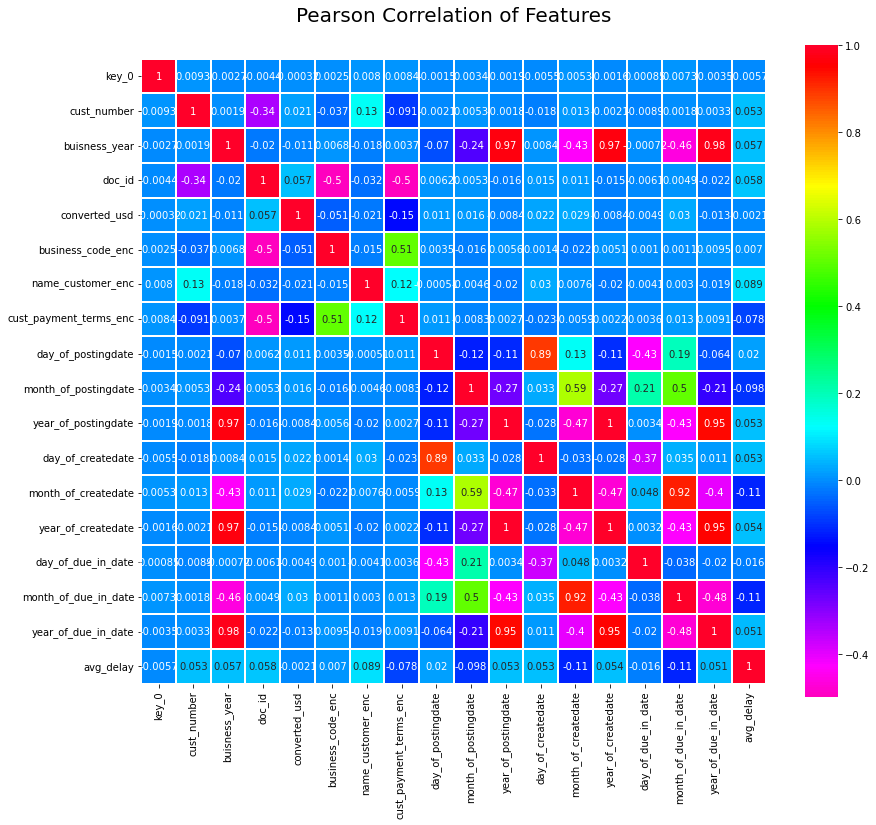

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train, on=X_train.index).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [90]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [91]:
sel.variances_

array([1.75072602e+15, 1.13988356e-01, 8.73121362e+16, 1.34006217e+09,
       2.80405486e-01, 1.04950926e+06, 1.26720791e+02, 8.22276832e+01,
       1.18882705e+01, 1.14612049e-01, 7.79405385e+01, 1.23123099e+01,
       1.14818732e-01, 7.59816840e+01, 1.21251083e+01, 1.17841771e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [92]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.linear_model import LinearRegression

Algorithm.append('LinearRegression')
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
predicted = regressor_lr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [94]:


MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test = regressor_lr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2387109.226872735

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression'],[6131022610333.257],[0.044797614645565864],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
Algorithm.append('Random Forest Regression')
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_val = model.predict(X_test)
mean_squared_error(y_val, predict_val)

5958308174285.364

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Random Forest Regression'],[6131022610333.257, 6446950524950.371],[0.044797614645565864, -0.004423390857448473],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('Desision Tree Regression ')
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
predict_DT = model.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predict_DT))
R2_Score.append(r2_score(y_test, predict_DT))

### Check the same for the Validation set also 

In [103]:
predict_val_RT = model1.predict(X_test)
mean_squared_error(y_val, predict_DT)

5958308174285.364

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Random Forest Regression', 'Desision Tree Regression '],[6131022610333.257, 6446950524950.371, 6446950524950.371],[0.044797614645565864, -0.004423390857448473, -0.004423390857448473],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(max_leaf_nodes=10)
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predict_RF))
R2_Score.append(r2_score(y_test, predict_RF))

### Check the same for the Validation set also 

In [107]:
predict_val_RF = model_RF.predict(X_test)
mean_squared_error(y_val, predict_RF)

6467133343656.661

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Random Forest Regression', 'Desision Tree Regression '],[6131022610333.257, 6446950524950.371, 6446950524950.371, 5869859457206.59],[0.044797614645565864, -0.004423390857448473, -0.004423390857448473, 0.08548636800505127],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [109]:
import xgboost as xgb

Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_val_Xb = model_RF.predict(X_test)
mean_squared_error(y_val, predict_val_Xb)

6467133343656.661

### Display The Comparison Lists


In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Random Forest Regression', 'Desision Tree Regression ', 'XGB Regressor'],[6131022610333.257, 6446950524950.371, 6446950524950.371, 5869859457206.59, 5329963615461.158],[0.044797614645565864, -0.004423390857448473, -0.004423390857448473, 0.08548636800505127, 0.169601177010811],

## You need to make the comparison list into a comparison dataframe 

In [113]:
comparision = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns=["Algorithm", "MSE_Score", "R2_score"])
comparision

,Algorithm,MSE_Score,R2_score
0,LinearRegression,6.131023e+12,0.044798
1,Random Forest Regression,6.446951e+12,-0.004423
2,Desision Tree Regression,6.446951e+12,-0.004423
3,XGB Regressor,5.869859e+12,0.085486


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [114]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [115]:
mean_squared_error(y_test, predictedfinal, squared=False)

2308671.3961629877

### Calculate the mean Square Error for validation dataset

In [116]:
mean_squared_error(y_val, predict_testfinal, squared=False)

2273400.286128379

### Calculate the R2 score for test

In [117]:
r2_score(y_test, predictedfinal)

0.169601177010811

### Calculate the R2 score for Validation

In [118]:
r2_score(y_val, predict_testfinal)

0.13153327797304804

### Calculate the Accuracy for train Dataset 

In [119]:
regressorfinal.score(X_train, y_train)

0.680224754545641

### Calculate the accuracy for validation

In [120]:
regressorfinal.score(X_val, y_val)

0.13153327797304804

### Calculate the accuracy for test

In [121]:
regressorfinal.score(X_test, y_test)

0.169601177010811

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [122]:
Nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589


### Check for the number of rows and columns in the nulldata

In [123]:
Nulldata.shape

(9464, 11)

### Check the Description and Information of the nulldata 

In [124]:
Nulldata.info(), Nulldata.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 3 to 50098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9464 non-null   object        
 1   cust_number           9464 non-null   object        
 2   name_customer         9464 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9464 non-null   int64         
 5   doc_id                9464 non-null   int64         
 6   posting_date          9464 non-null   datetime64[ns]
 7   due_in_date           9464 non-null   datetime64[ns]
 8   baseline_create_date  9464 non-null   datetime64[ns]
 9   cust_payment_terms    9464 non-null   object        
 10  converted_usd         9464 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 887.2+ KB


(None,
        buisness_year        doc_id  converted_usd
 count         9464.0  9.464000e+03    9464.000000
 mean          2020.0  2.014942e+09   32375.615590
 std              0.0  2.813097e+08   35367.557011
 min           2020.0  1.930535e+09       0.720000
 25%           2020.0  1.930660e+09    5758.240000
 50%           2020.0  1.930732e+09   19429.170000
 75%           2020.0  1.930820e+09   48778.890000
 max           2020.0  2.960636e+09  653644.800000)

### Storing the Nulldata into a different dataset 
# for BACKUP

In [125]:
nulldata1 = Nulldata.copy()
nulldata = Nulldata

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [126]:
from sklearn.preprocessing import LabelEncoder

business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [127]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',
                                                                                                               "3").astype(
    int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [128]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.day

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.day

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.day
nulldata['year_of_due'] = nulldata['due_in_date'].dt.day

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.day

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [129]:
nulldata['cust_payment_terms_enc'] = label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc'] = label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc'] = label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [130]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [131]:
nulldata.drop(["business_code", "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date",
               "cust_payment_terms", 'day_of_cleardate', "month_of_cleardate", "year_of_cleardate"], axis=1,
              inplace=True)

### Check the information of the "nulldata" dataframe

In [132]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9464 non-null   int32  
 1   buisness_year           9464 non-null   int64  
 2   doc_id                  9464 non-null   int64  
 3   converted_usd           9464 non-null   float64
 4   business_code_enc       9464 non-null   int32  
 5   day_of_postingdate      9464 non-null   int64  
 6   month_of_postingdate    9464 non-null   int64  
 7   year_of_postingdate     9464 non-null   int64  
 8   day_of_due              9464 non-null   int64  
 9   month_of_due            9464 non-null   int64  
 10  year_of_due             9464 non-null   int64  
 11  day_of_createdate       9464 non-null   int64  
 12  month_of_createdate     9464 non-null   int64  
 13  year_of_createdate      9464 non-null   int64  
 14  cust_payment_terms_enc  9464 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [133]:
nulldata.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9464 non-null   int32  
 1   buisness_year           9464 non-null   int64  
 2   doc_id                  9464 non-null   int64  
 3   converted_usd           9464 non-null   float64
 4   business_code_enc       9464 non-null   int32  
 5   day_of_postingdate      9464 non-null   int64  
 6   month_of_postingdate    9464 non-null   int64  
 7   year_of_postingdate     9464 non-null   int64  
 8   day_of_due              9464 non-null   int64  
 9   month_of_due            9464 non-null   int64  
 10  year_of_due             9464 non-null   int64  
 11  day_of_createdate       9464 non-null   int64  
 12  month_of_createdate     9464 non-null   int64  
 13  year_of_createdate      9464 non-null   int64  
 14  cust_payment_terms_enc  9464 non-null  

(None, None)

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [134]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [135]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [136]:
nulldata2 = nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
                      'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
                      'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
                      'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
                      'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [137]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.790,66,2684,5,30,30,30,31,31,31,10,10,10
7,200744019,2020,1930659387,11173.020,66,2773,20,19,19,19,19,19,19,3,3,3
10,200418007,2020,1930610806,3525.590,66,93,20,3,3,3,11,11,11,26,26,26
14,200739534,2020,1930788296,121105.650,66,2005,20,15,15,15,15,15,15,30,30,30
15,200353024,2020,1930817482,3726.060,66,714,35,23,23,23,16,16,16,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,140106408,2020,2960618884,64982.589,66,2954,5,3,3,3,6,6,6,16,16,16
50095,140106408,2020,2960618885,64982.589,66,2954,5,3,3,3,6,6,6,16,16,16
50096,140106408,2020,2960618886,64982.589,66,2954,5,3,3,3,6,6,6,16,16,16
50097,140106408,2020,2960618887,64982.589,66,2954,5,3,3,3,6,6,6,16,16,16


### Now you can pass this dataset into you final model and store it into "final_result"

In [138]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [139]:
final_result = pd.Series(final_result, name='avg_delay')

### Display the "avg_delay" column

In [140]:
final_result

0       1269497.750
1        712644.375
2      -1268306.875
3       6856837.500
4      -2705659.500
           ...     
9459   -1864587.250
9460   -1864587.250
9461   -1864587.250
9462   -1864587.250
9463   -1864587.250
Name: avg_delay, Length: 9464, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [141]:
nulldata1.reset_index(drop=True, inplace=True)
Final = nulldata1.merge(final_result, on=nulldata.index)

### Display the "Final" dataframe 

In [142]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,1269497.750
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,712644.375
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590,-1268306.875
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,6856837.500
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,-2705659.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,-1864587.250
9460,50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,-1864587.250
9461,50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,-1864587.250
9462,50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,-1864587.250


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [143]:
Final.shape

(9464, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [144]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [145]:
Final['clear_date']

0      2020-04-24 16:38:17.750
1      2020-04-11 05:57:24.375
2      2020-03-11 07:41:33.125
3      2020-07-18 08:40:37.500
4      2020-03-25 16:25:40.500
                 ...          
9459   2020-02-23 10:03:32.750
9460   2020-02-23 10:03:32.750
9461   2020-02-23 10:03:32.750
9462   2020-02-23 10:03:32.750
9463   2020-02-23 10:03:32.750
Name: clear_date, Length: 9464, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [146]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay // (24 * 3600), axis=1)

### Display the "avg_delay" column 

In [147]:
Final['avg_delay']

0       14.0
1        8.0
2      -15.0
3       79.0
4      -32.0
        ... 
9459   -22.0
9460   -22.0
9461   -22.0
9462   -22.0
9463   -22.0
Name: avg_delay, Length: 9464, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [148]:
bins = [0, 15, 30, 45, 60, 100]
labels = ["0-15", "16-30", "31-45", "46-60", "Greatar than 60"]
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [149]:
Final.drop(columns=['key_0', 'avg_delay'], inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [150]:
Final.groupby('Aging Bucket')['Aging Bucket'].count()

Aging Bucket
0-15               1602
16-30              1740
31-45              1389
46-60               615
Greatar than 60     632
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [151]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-24 16:38:17.750,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,0-15
1,U001,200744019,TARG us,2020-04-11 05:57:24.375,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,0-15
2,U001,200418007,AM,2020-03-11 07:41:33.125,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590,NaN
3,U001,200739534,OK systems,2020-07-18 08:40:37.500,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,Greatar than 60
4,U001,200353024,DECA corporation,2020-03-25 16:25:40.500,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9459,CA02,140106408,WAL-M corp,2020-02-23 10:03:32.750,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,NaN
9460,CA02,140106408,WAL-M corp,2020-02-23 10:03:32.750,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,NaN
9461,CA02,140106408,WAL-M corp,2020-02-23 10:03:32.750,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,NaN
9462,CA02,140106408,WAL-M corp,2020-02-23 10:03:32.750,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,NaN


### Store this dataframe into the .csv format

In [152]:
Final.to_csv('Predicted Dates.csv')

## Save the model to disk (.sav) using Pickle

> The created model.sav would be then consumed by the flask service.

In [156]:
import pickle

filename = 'model.sav'
pickle.dump(regressorfinal, open(filename, 'wb'))

---
# END OF THE PROJECT